### Instructions:

    1. Submit your python notebooks in zip format with naming convention as:
        
            RollNo1_RollNo2_RollNo3.zip
            
    2. Cheating of any form will not be tolerated.

Fill your Team details here.<br>
<br>
Format: Roll Number
 
         1.MT2019071
         2.MT2019083
         3.MT2019003

# Problem statement is to predict price column based on data with 24 Columns with over 200 data entries using Linear Regression.

In [64]:
#import required librarie
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


In [65]:
#Read data("Data.csv") into dataframe
temp= pd.read_csv('Data.csv')
#read df in X
X= pd.read_csv('Data.csv')
#Copy Target(column to be predicted) in Y
Y = X['price']
#drop target from X, now X is input data
X = X.drop('price',axis=1)
X


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,five,131,mpfi,3.13,3.40,7.00,160,5500,16,22


In [66]:
#Check for null values in X and Y
X.isnull().sum()


#what did you observe?
#ans:- the data is complete as no null values found

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
dtype: int64

In [67]:
#Check if scaling and encoding are required in X
X.describe()
X.info()
#is it required or not?
#ans:- scaling is required as we see the data are in different scales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

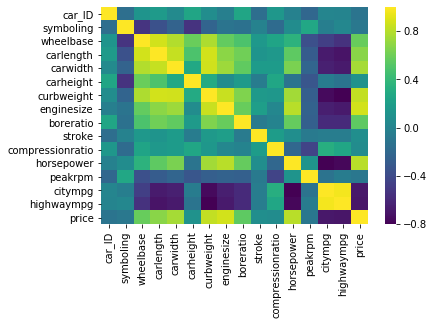

In [68]:
#Plot relationships between the target variable and any 7 features using pair plot,scatter plot,matrix heatmap
#sns.pairplot(X['car_ID','symboling','wheelbase','carlength','carheight','curbweight'])
sns.heatmap(temp.corr(),cmap='viridis')
#What did you observe?
#ans:-it is observed form correlation matrix that enginesize, curbweight, horsepower and carwidth  directly impacts the price

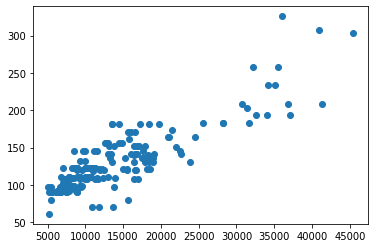

In [69]:
plt.scatter(x='price',y='enginesize',data=temp)
# price of the car increases as the size of the engine increases

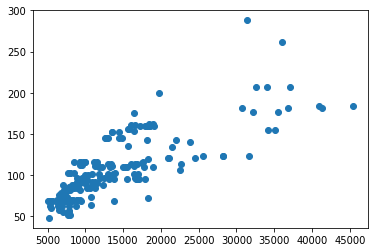

In [70]:
plt.scatter(x='price',y='horsepower',data=temp)
# price of the car increases as horsepower of the engine increases

In [71]:
cleanup_nums = {"doornumber":     {"four": 4, "two": 2},
                "cylindernumber": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}
X.replace(cleanup_nums, inplace=True)


#Cat=X.select_dtypes(include=['object']).copy(deep='False')


#Cat=Cat.iloc[:, :].apply(pd.Series)
#Name=Cat.CarName.copy()


#Temp=[]
#Temp=Name.str.split(pat=" ",expand=True)
#Temp=Temp[0]
#X.CarName=Temp
#Cat.CarName=Temp


cleanup_nums = {"CarName":     { "maxda": "mazda" , "porcshce": "porsche" , "Nissan":"nissan" , "vokswagen":"volkswagen", "toyouta" : "toyota","vw" : "volkswagen"} }
X.replace(cleanup_nums, inplace=True)

#check if One hot encoding is required? if yes do it.
No


In [73]:
#Scale the Dataset
sc_X = StandardScaler()

X = sc_X.fit_transform(X)


ValueError: could not convert string to float: 'alfa-romero giulia'

In [ ]:
#Splitting data into test and train - 30% Test and 70% Train

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=0)


In [74]:
#Find correlation coeff using linear regression.
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)


NameError: name 'X_train' is not defined

In [75]:
# Print The coefficients
print('Coefficients: \n', linear_model.coef_)
#What did you observe looking at the coeffients, Describe your observation in atleast 30 words?
#ans:-

AttributeError: 'LinearRegression' object has no attribute 'coef_'